## Used Car Purchases

***
I have done the following:
* Imported and cleaned the data
* Carried out feature engineering
* Fitted the model to the data
* Combined the individual steps into to a data pipeline
* interpreted your model.
***

**Scenario**: You work as a data scientist for a US used car dealer. The dealer buys used cars at low prices in online auctions and from other car dealers in order to resell them profitably on their own platform. It's not always easy to tell whether it is worth buying a used car: One of the biggest challenges in used car auctions is the risk of a car having problems that are so serious, that they prevent it from being resold to customers. These are referred to as "lemons" - cars that have significant defects from the outset due to production faults that significantly affect the safety, use or value of that car and at the same time cannot be repaired with a reasonable number of repairs or within a certain period of time. In cases like this, the customer has the right to be refunded the purchase price. In addition to the purchase costs, the bad purchase of these so-called lemons leads to considerable costs as a result, such as the storage and repair of the car, which can result in market losses when the vehicle is resold.

That is why it is important for your boss to rule out as many bad purchases as possible. To help the buyers in the company with the large number of cars on offer, you are to develop a model that predicts whether a car would be a bad buy, a so-called lemon. However, this must not lead to too many good purchases being excluded. You won't receive more detailed information on the costs and profits of the respective purchases for developing the prototype just yet.

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [95]:
df = pd.read_csv('data_train.csv')
df.head()

IsBadBuy   PurchDate  Auction  VehYear  VehicleAge       Make  \
0         0  1257897600    OTHER     2007           2        KIA   
1         0  1231286400    ADESA     2005           4     SUZUKI   
2         1  1288656000    OTHER     2006           4  CHEVROLET   
3         0  1236124800  MANHEIM     2004           5  CHEVROLET   
4         0  1248307200  MANHEIM     2007           2   CHRYSLER   

                  Model Trim        SubModel   Color  ...  \
0               SPECTRA  NaN     4D SEDAN EX   BLACK  ...   
1   FORENZA 2.0L I4 EFI   EX        4D WAGON  SILVER  ...   
2                COBALT   LT     2D COUPE LT     RED  ...   
3   VENTURE FWD V6 3.4L   LS  PASSENGER 3.4L  SILVER  ...   
4  TOWN & COUNTRY 2WD V  Bas    MINIVAN 3.3L     RED  ...   

  MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice PRIMEUNIT  \
0                       9568.0                     10428.0       NaN   
1                       5227.0                      5978.0       NaN   
2                       8235.0                      9230.0       NaN   
3                       4325.0                      5325.0       NaN   
4                          0.0                         0.0       NaN   

   AUCGUART  BYRNO VNZIP1 VNST  VehBCost  IsOnlineSale  WarrantyCost  
0       NaN   5546  35004   AL    6400.0             0           462  
1       NaN  20207  77086   TX    3870.0             0           569  
2       NaN   1235  84104   UT    5310.0             1           803  
3       NaN  20928  32824   FL    4600.0             0          4622  
4       NaN    835  85353   AZ    6215.0             0          1623  

[5 rows x 33 columns]

## Preparation


* What problem should the model solve?
* What is the nature of the problem (e.g. classification, regression, clustering...)
* What would an application using your model look like? Which requirements has your employer specified for your model?
* What data do you need so that you can build your model?


### Define metric

In [96]:
#define metrics
#sklearn.metrics.precision_score() 
#sklearn.metrics.recall_score() 
#sklearn.metrics.f1_score()

### Gather data

In [97]:
df.describe()

IsBadBuy     PurchDate       VehYear    VehicleAge   WheelTypeID  \
count  65620.000000  6.562000e+04  65620.000000  65620.000000  62747.000000   
mean       0.123499  1.263117e+09   2005.345215      4.175130      1.494589   
std        0.329012  1.820249e+07      1.730096      1.709897      0.520986   
min        0.000000  1.231114e+09   2001.000000      0.000000      0.000000   
25%        0.000000  1.248048e+09   2004.000000      3.000000      1.000000   
50%        0.000000  1.264032e+09   2005.000000      4.000000      1.000000   
75%        0.000000  1.279066e+09   2007.000000      5.000000      2.000000   
max        1.000000  1.293667e+09   2010.000000      9.000000      3.000000   

              VehOdo  MMRAcquisitionAuctionAveragePrice  \
count   65620.000000                       65602.000000   
mean    71505.930280                        6127.143807   
std     14582.977355                        2456.965693   
min      5368.000000                           0.000000   
25%     61844.750000                        4273.000000   
50%     73378.500000                        6094.000000   
75%     82440.000000                        7765.000000   
max    115717.000000                       35722.000000   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
count                     65602.000000                      65602.000000   
mean                       7371.157236                       8498.240770   
std                        2716.442814                       3153.983067   
min                           0.000000                          0.000000   
25%                        5405.000000                       6279.000000   
50%                        7303.000000                       8447.000000   
75%                        9018.750000                      10658.000000   
max                       36859.000000                      39080.000000   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
count                   65602.000000                   65330.000000   
mean                     9851.611003                    6131.694092   
std                      3382.364048                    2430.506847   
min                         0.000000                       0.000000   
25%                      7494.000000                    4275.000000   
50%                      9792.000000                    6062.000000   
75%                     12094.000000                    7735.000000   
max                     41482.000000                   35722.000000   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
count                 65330.000000                  65330.000000   
mean                   7389.951768                   8776.866019   
std                    2681.441548                   3087.008256   
min                       0.000000                      0.000000   
25%                    5412.000000                   6540.000000   
50%                    7314.000000                   8736.000000   
75%                    9012.000000                  10910.000000   
max                   36859.000000                  39080.000000   

       MMRCurrentRetailCleanPrice         BYRNO       VNZIP1      VehBCost  \
count                65330.000000  65620.000000  65620.00000  65564.000000   
mean                 10145.912582  26363.516931  58090.45413   6727.464264   
std                   3305.658577  25733.105869  26147.50006   1759.011960   
min                      0.000000    835.000000   3106.00000      1.000000   
25%                   7790.250000  17212.000000  32124.00000   5435.000000   
50%                  10103.000000  19662.000000  73129.00000   6700.000000   
75%                  12309.000000  22808.000000  80022.00000   7900.000000   
max                  41062.000000  99761.000000  99224.00000  38785.000000   

       IsOnlineSale  WarrantyCost  
count  65620.000000  65620.000000  
mean       0.025236   1277.375815  
std        0.15684

## EDA

### Understand the data

In [98]:
#The 'PurchDate' column is indicated as a Unix timestamp in whole seconds.
# need to convert it
df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s') 

In [99]:
# Set up the plotting area
plt.figure(figsize=(16, 8))

# Vehicle Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['VehicleAge'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')

# Vehicle Cost Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['VehBCost'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Vehicle Cost')
plt.xlabel('Vehicle Cost ($)')
plt.ylabel('Frequency')

# Proportion of Bad Buys
plt.subplot(2, 2, 3)
sns.countplot(x='IsBadBuy', data=df, palette='pastel')
plt.title('Proportion of Bad Buys')
plt.xlabel('Is Bad Buy')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

C:\Users\ASANGWA\AppData\Local\Temp\ipykernel_22008\1784656464.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsBadBuy', data=df, palette='pastel')


In [100]:
df.dtypes

IsBadBuy                                      int64
PurchDate                            datetime64[ns]
Auction                                      object
VehYear                                       int64
VehicleAge                                    int64
Make                                         object
Model                                        object
Trim                                         object
SubModel                                     object
Color                                        object
Transmission                                 object
WheelTypeID                                 float64
WheelType                                    object
VehOdo                                        int64
Nationality                                  object
Size                                         object
TopThreeAmericanName                         object
MMRAcquisitionAuctionAveragePrice           float64
MMRAcquisitionAuctionCleanPrice             float64
MMRAcquisiti

In [101]:
#check for nans and duplicates
missing_values = df.isnull().sum()
print(missing_values)
duplicate_values = df.duplicated().sum()
print(duplicate_values)

IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2098
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2873
WheelType                             2877
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          290
MMRCurrentAuctionCleanPrice            290
MMRCurrentR

In [102]:
sns.pairplot(df)


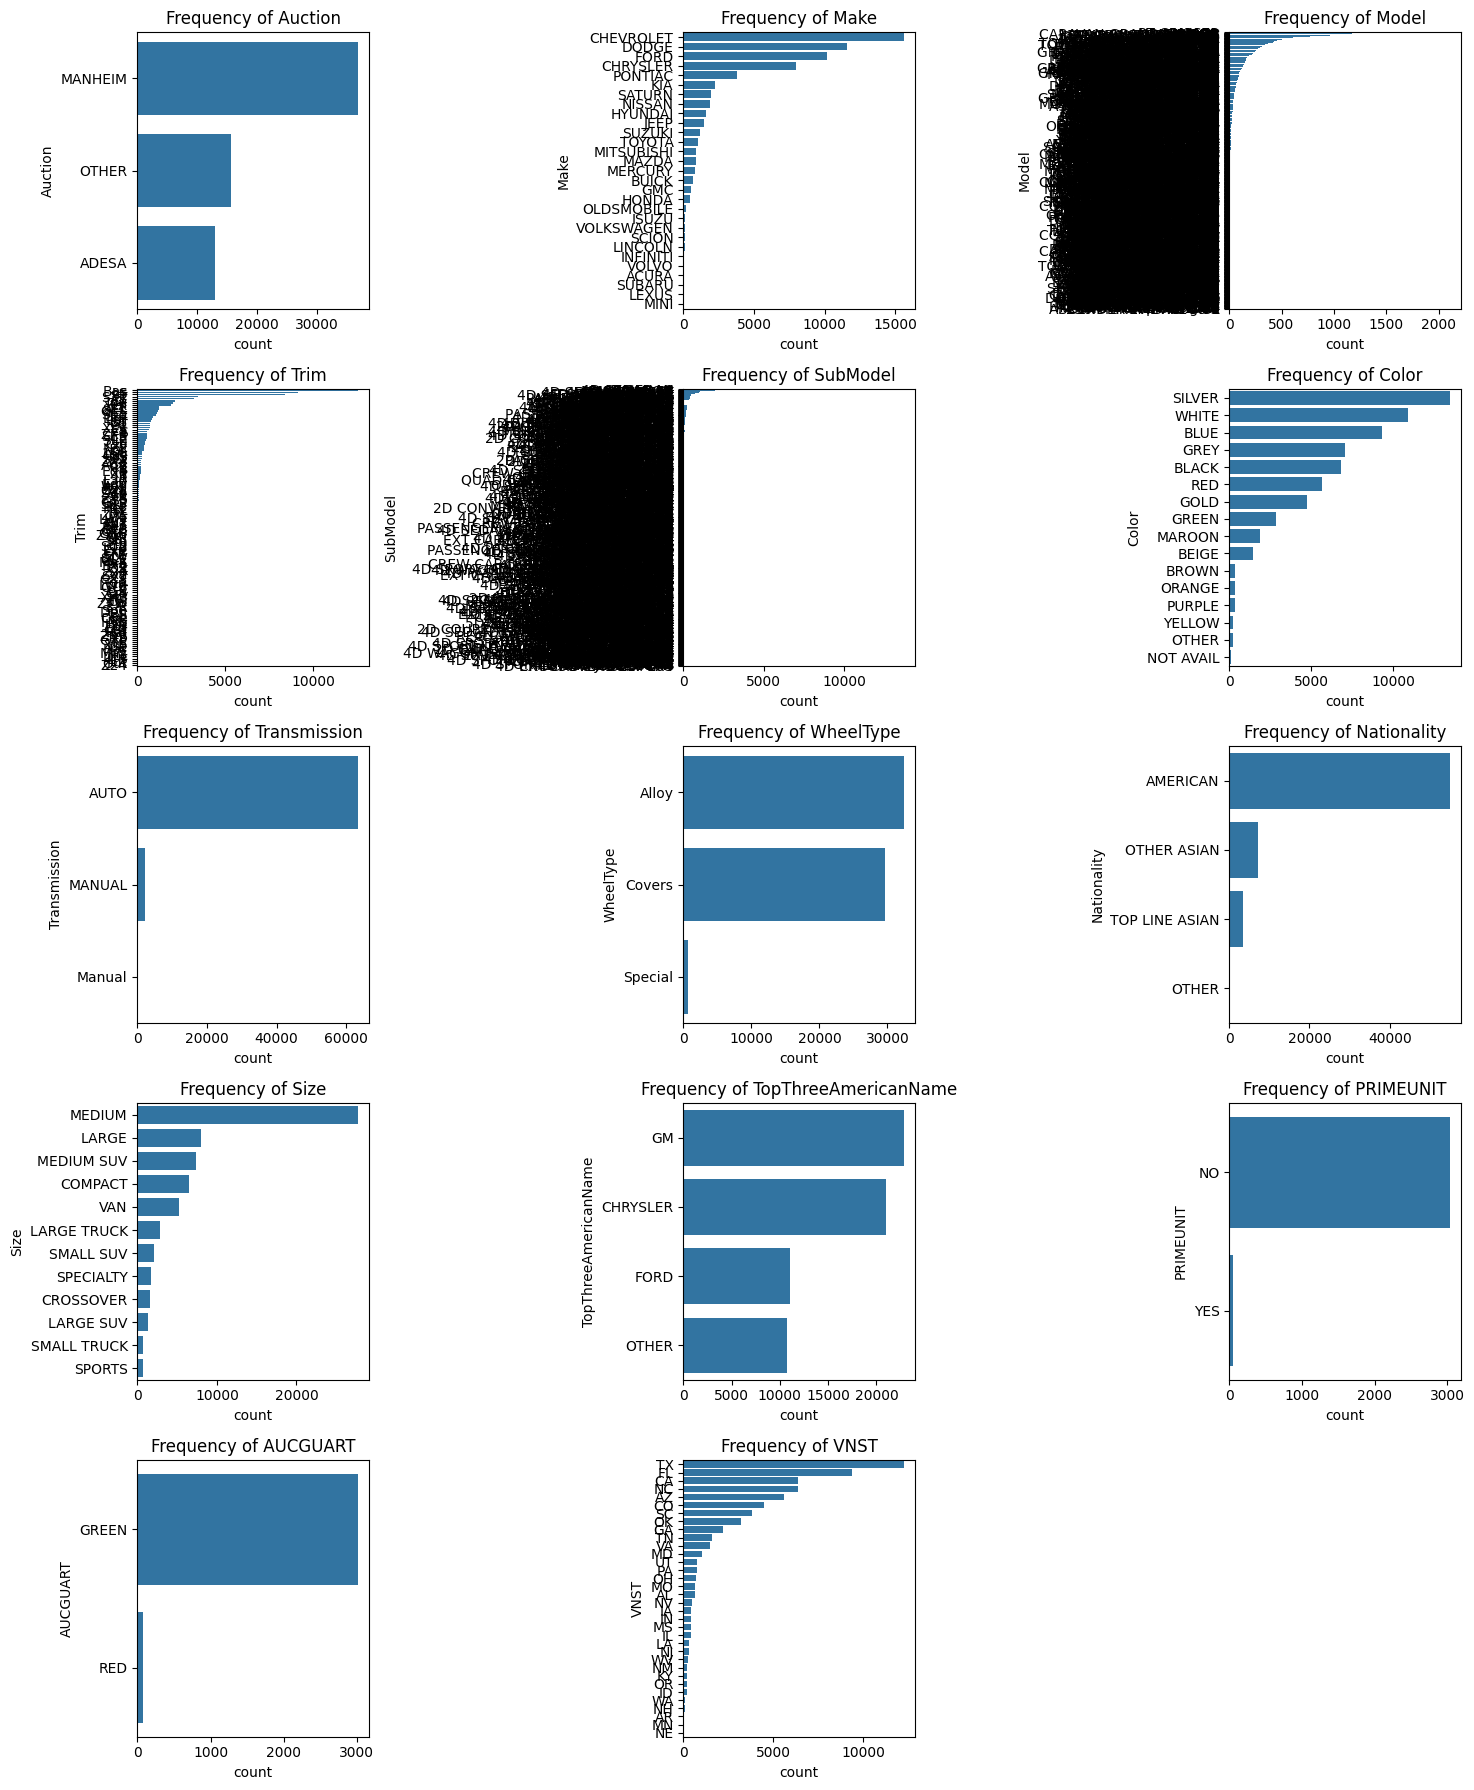

In [103]:
# Separate numerical and categorical columns
numerical_cols = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
                  'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
                  'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
                  'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
                  'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost']

categorical_cols = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
                    'Transmission', 'WheelType', 'Nationality', 'Size', 
                    'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']

# Set up the plot for numerical columns (histograms)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Set up the plot for categorical columns (bar plots)
plt.figure(figsize=(15, 18))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Frequency of {col}")
plt.tight_layout()
plt.show()


* PRIMEUNIT and AUCGUART has more than 95% of missing values so we can drop these columns
* WheelType and WheelTypeID have around 4.4% missing values.
* Trim has about 3.2% missing values.
* A few other columns have less than 1% missing data, such as various MMR price columns and vehicle cost (VehBCost)
* So we can impute these columns

In [104]:

# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

C:\Users\ASANGWA\AppData\Local\Temp\ipykernel_22008\2798003640.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


<Axes: >

* Features MMRAcquisitionAuctionAveragePrice and MMRAcquisitionAuctionCleanPrice have a correlation of 0.95
* Features MMRAcquisitionRetailAveragePrice and MMRAcquisitonRetailCleanPrice have a correlation of 0.92
* Features MMRCurrentAuctionAveragePrice and MMRCurrentAuctionCleanPrice have a correlation of 0.89

In [105]:
# Are the target categories balanced?

# Calculate the frequency distribution of the target variable
target_distribution = df['IsBadBuy'].value_counts(normalize=True) * 100  # Get percentages for easier interpretation

# Display the distribution
print(target_distribution)


# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=df['IsBadBuy'], order=target_distribution.index)
plt.title('Distribution of Target Variable')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

#data is imbalanced
#0-not a lemon, 1 -lemon

0    87.650107
1    12.349893
Name: IsBadBuy, dtype: float64


* Dealing with Imbalanced Data
 When dealing with imbalanced data, it's important to use techniques to ensure your model doesn't become biased towards the majority class (good buys, in this case). Here are some strategies to consider:

* Resampling Techniques:

* Oversampling the Minority Class: 
 Increase the number of instances of the minority class (1 for lemons) by duplicating existing instances or    creating synthetic examples (eg., using SMOTE - Synthetic Minority Over-sampling Technique).
 Undersampling the Majority Class: Reduce the number of instances of the majority class (0 for good buys) to balance the dataset.

* Class Weight Adjustment:
 Adjust the weights of classes when training the model so that the model gives more importance to correctly predicting the minority class. Many machine learning algorithms, like logistic regression, decision trees, and SVMs, allow you to specify class weights.

* Anomaly Detection Techniques
 Since "lemons" are rare, you might consider using anomaly detection techniques to identify unusual patterns or outliers that correspond to bad buys.

* Performance Metrics:
 Use performance metrics that are suitable for imbalanced data, such as Precision, Recall, F1-Score, and Area Under the Precision-Recall Curve (AUC-PR), rather than relying solely on accuracy.

* Ensemble Methods:
 Use ensemble methods like Random Forests, Gradient Boosting Machines, or XGBoost which can be effective on imbalanced datasets and also allow for adjustments in class weights

## Training/test split

In [106]:
# perform train-test-split
from sklearn.model_selection import train_test_split


# Define the features (X) and target (y)
features = df.drop('IsBadBuy', axis=1)  # Features
target = df['IsBadBuy']  # Target variable

# Split the data into training and test sets

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

In [107]:
# Save the test features to a CSV file
features_test.to_csv('features_test.csv', index=False)

## Data preparation

### Transforming data types

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  object        
 3   VehYear                            65620 non-null  int64         
 4   VehicleAge                         65620 non-null  int64         
 5   Make                               65620 non-null  object        
 6   Model                              65620 non-null  object        
 7   Trim                               63522 non-null  object        
 8   SubModel                           65613 non-null  object        
 9   Color                              65613 non-null  object        
 10  Transmission                      

In [109]:
#copy target_train


df = features_train.copy()

In [110]:
#change datetime
df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'])

C:\Users\ASANGWA\AppData\Local\Temp\ipykernel_22008\1515487406.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'])


### Data Imputation

In [111]:
def clean_data(features_train, features_test):
    """
    Clean the training and test datasets by filling missing values.
    
    Args:
        features_train (pd.DataFrame): Training features.
        features_test (pd.DataFrame): Test features.
    
    Returns:
        pd.DataFrame, pd.DataFrame: Cleaned training and test features.
    """
    # Analyze the training set to determine suitable values for missing data
    missing_values_summary = features_train.isnull().sum()
    print("Missing values in training set:\n", missing_values_summary)

    # Define strategies for each column with missing values
    fill_values = {
        'Trim': features_train['Trim'].mode()[0],
        'SubModel': features_train['SubModel'].mode()[0],
        'Color': features_train['Color'].mode()[0],
        'Transmission': features_train['Transmission'].mode()[0],
        'WheelTypeID': features_train['WheelTypeID'].median(),
        'WheelType': features_train['WheelType'].mode()[0],
        'Nationality': features_train['Nationality'].mode()[0],
        'Size': features_train['Size'].mode()[0],
        'TopThreeAmericanName': features_train['TopThreeAmericanName'].mode()[0],
        'MMRAcquisitionAuctionAveragePrice': features_train['MMRAcquisitionAuctionAveragePrice'].median(),
        'MMRAcquisitionAuctionCleanPrice': features_train['MMRAcquisitionAuctionCleanPrice'].median(),
        'MMRAcquisitionRetailAveragePrice': features_train['MMRAcquisitionRetailAveragePrice'].median(),
        'MMRAcquisitonRetailCleanPrice': features_train['MMRAcquisitonRetailCleanPrice'].median(),
        'MMRCurrentAuctionAveragePrice': features_train['MMRCurrentAuctionAveragePrice'].median(),
        'MMRCurrentAuctionCleanPrice': features_train['MMRCurrentAuctionCleanPrice'].median(),
        'MMRCurrentRetailAveragePrice': features_train['MMRCurrentRetailAveragePrice'].median(),
        'MMRCurrentRetailCleanPrice': features_train['MMRCurrentRetailCleanPrice'].median(),
        'PRIMEUNIT': 'Missing',  # Since this column has many missing values, we can fill with a placeholder
        'AUCGUART': 'Missing',   # Same as above
        'VehBCost': features_train['VehBCost'].median()
    }

    # Fill missing values in the training set
    features_train_filled = features_train.fillna(fill_values)

    # Fill missing values in the test set using the same strategies
    features_test_filled = features_test.fillna(fill_values)

    # Verify that there are no missing values left
    print("Missing values in filled training set:\n", features_train_filled.isnull().sum())
    print("Missing values in filled test set:\n", features_test_filled.isnull().sum())

    return features_train_filled, features_test_filled

# Example usage
features_train_cleaned, features_test_cleaned = clean_data(features_train, features_test)


Missing values in training set:
 PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1871
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2604
WheelType                             2608
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       15
MMRAcquisitionAuctionCleanPrice         15
MMRAcquisitionRetailAveragePrice        15
MMRAcquisitonRetailCleanPrice           15
MMRCurrentAuctionAveragePrice          261
MMRCurrentAuctionCleanPrice            261
MMRCurrentRetailAvera

### Dealing with outliers 

• Are there impossible values that only have to be sorted out in the training set? 
Your colleagues tell you that a symbolic purchase price of one dollar is common. These are defective cars that the owner does not wish to dispose of or wants to repair. If they are repaired, they can be sold at a profit. 

In [112]:
# Filter out rows with a symbolic purchase price of one dollar from the training set
features_train_filtered = features_train[features_train['VehBCost'] > 1]

# Check the shape of the filtered training set
print("Original training set shape:", features_train.shape)
print("Filtered training set shape:", features_train_filtered.shape)

# Update the target variable to match the filtered features
target_train_filtered = target_train[features_train['VehBCost'] > 1]

# Check the distribution of the target variable after filtering
print("Target distribution before filtering:")
print(target_train.value_counts())
print("\nTarget distribution after filtering:")
print(target_train_filtered.value_counts())

Original training set shape: (59058, 32)
Filtered training set shape: (59006, 32)
Target distribution before filtering:
0    51800
1     7258
Name: IsBadBuy, dtype: int64

Target distribution after filtering:
0    51766
1     7240
Name: IsBadBuy, dtype: int64


In [116]:


def detect_outliers_iqr(df, column):
    """
    Detect outliers in a DataFrame column using the IQR method.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        column (str): Column name to check for outliers.
    
    Returns:
        pd.Series: Boolean series indicating whether each value is an outlier.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Detect outliers in numerical columns
outliers = pd.DataFrame()
for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(features_train_filtered, col)

# Count the number of outliers in each column
outlier_counts = outliers.sum()
print("Number of outliers in each column:")
print(outlier_counts)

# Remove outliers from the training set
features_train_no_outliers = features_train_filtered[~outliers.any(axis=1)]
target_train_no_outliers = target_train_filtered[~outliers.any(axis=1)]

print("Original training set shape:", features_train_filtered.shape)
print("Training set shape after removing outliers:", features_train_no_outliers.shape)



Number of outliers in each column:
VehicleAge                            505
VehOdo                                273
MMRAcquisitionAuctionAveragePrice     415
MMRAcquisitionAuctionCleanPrice       666
MMRAcquisitionRetailAveragePrice      235
MMRAcquisitonRetailCleanPrice        1003
MMRCurrentAuctionAveragePrice         448
MMRCurrentAuctionCleanPrice          1068
MMRCurrentRetailAveragePrice          219
MMRCurrentRetailCleanPrice            732
VehBCost                              133
WarrantyCost                          690
dtype: int64
Original training set shape: (59006, 32)
Training set shape after removing outliers: (55913, 32)


In [ ]:
# Set a correlation threshold
correlation_threshold = 0.9

# Find pairs of features with correlation greater than the threshold
redundant_pairs = set()
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            redundant_pairs.add((correlation_matrix.index[i], correlation_matrix.columns[j]))

# Print the redundant feature pairs
print("Redundant feature pairs with correlation greater than", correlation_threshold, ":")
for pair in redundant_pairs:
    print(pair)

In [ ]:
def clean_data(df):
    """
    Clean the dataset by filling missing values and handling outliers.
    
    Args:
        df (pd.DataFrame): The uncleaned DataFrame.
    
    Returns:
        pd.DataFrame: The cleaned DataFrame.
    """
    # Fill missing values
    fill_values = {
        'Trim': df['Trim'].mode()[0],
        'SubModel': df['SubModel'].mode()[0],
        'Color': df['Color'].mode()[0],
        'Transmission': df['Transmission'].mode()[0],
        'WheelTypeID': df['WheelTypeID'].median(),
        'WheelType': df['WheelType'].mode()[0],
        'Nationality': df['Nationality'].mode()[0],
        'Size': df['Size'].mode()[0],
        'TopThreeAmericanName': df['TopThreeAmericanName'].mode()[0],
        'MMRAcquisitionAuctionAveragePrice': df['MMRAcquisitionAuctionAveragePrice'].median(),
        'MMRAcquisitionAuctionCleanPrice': df['MMRAcquisitionAuctionCleanPrice'].median(),
        'MMRAcquisitionRetailAveragePrice': df['MMRAcquisitionRetailAveragePrice'].median(),
        'MMRAcquisitonRetailCleanPrice': df['MMRAcquisitonRetailCleanPrice'].median(),
        'MMRCurrentAuctionAveragePrice': df['MMRCurrentAuctionAveragePrice'].median(),
        'MMRCurrentAuctionCleanPrice': df['MMRCurrentAuctionCleanPrice'].median(),
        'MMRCurrentRetailAveragePrice': df['MMRCurrentRetailAveragePrice'].median(),
        'MMRCurrentRetailCleanPrice': df['MMRCurrentRetailCleanPrice'].median(),
        'PRIMEUNIT': 'Missing',  # Since this column has many missing values, we can fill with a placeholder
        'AUCGUART': 'Missing',   # Same as above
        'VehBCost': df['VehBCost'].median()
    }
    
    df_filled = df.fillna(fill_values)
    
    # Handle outliers using IQR method
    def detect_outliers_iqr(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (df[column] < lower_bound) | (df[column] > upper_bound)
    
    numerical_cols = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
                      'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
                      'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
                      'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
                      'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost']
    
    for col in numerical_cols:
        outliers = detect_outliers_iqr(df_filled, col)
        df_filled.loc[outliers, col] = df_filled[col].median()
    
    return df_filled

# Example usage
features_test_cleaned = clean_data(features_test)

In [114]:
def filter_train(df):
    """
    Apply any filtering logic to the training data if necessary.
    
    Args:
        df (pd.DataFrame): The training DataFrame.
    
    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    # Example: Filter out certain rows or apply additional cleaning
    # (Adjust this function as per your specific use case)
    return df


### Resample

In [115]:
from imblearn.over_sampling import SMOTE

# Define the features (X) and target (y)
features = df.drop('IsBadBuy', axis=1)  # Features
target = df['IsBadBuy']  # Target variable

# Perform train-test-split
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
features_train_resampled, target_train_resampled = smote.fit_resample(features_train, target_train)

# Check the distribution of the target variable after resampling
print("Before resampling:")
print(target_train.value_counts())
print("\nAfter resampling:")
print(target_train_resampled.value_counts())

KeyError: "['IsBadBuy'] not found in axis"

## Modeling

### Build a simple baseline model

### Feature engineering

In [25]:
import pandas as pd
from category_encoders import TargetEncoder


# Feature Engineering
# 1. Extract year, month, and day from 'PurchDate'
df['PurchDate'] = pd.to_datetime(df['PurchDate'], unit='s')
df['PurchYear'] = df['PurchDate'].dt.year
df['PurchMonth'] = df['PurchDate'].dt.month
df['PurchDay'] = df['PurchDate'].dt.day

# 2. Calculate the age of the vehicle at the time of purchase
df['VehicleAgeAtPurchase'] = df['PurchYear'] - df['VehYear']

# 3. Identify high cardinality features
cat_cols = ['Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST']
high_cardinality_cols = [col for col in cat_cols if df[col].nunique() > 10]

# 4. Apply target encoding to high cardinality features
target_encoder = TargetEncoder(cols=high_cardinality_cols)
df[high_cardinality_cols] = target_encoder.fit_transform(df[high_cardinality_cols], df['IsBadBuy'])

# Now df contains the engineered features
print(df.head())

   IsBadBuy  PurchDate  Auction  VehYear  VehicleAge      Make     Model  \
0         0 2009-11-11    OTHER     2007           2  0.118145  0.088380   
1         0 2009-01-07    ADESA     2005           4  0.150502  0.125000   
2         1 2010-11-02    OTHER     2006           4  0.098132  0.130832   
3         0 2009-03-04  MANHEIM     2004           5  0.098132  0.141892   
4         0 2009-07-23  MANHEIM     2007           2  0.128756  0.053097   

       Trim  SubModel     Color  ...  BYRNO  VNZIP1      VNST  VehBCost  \
0  0.157769  0.098225  0.114236  ...   5546   35004  0.128000    6400.0   
1  0.121417  0.101362  0.123669  ...  20207   77086  0.137771    3870.0   
2  0.077067  0.097562  0.133594  ...   1235   84104  0.120558    5310.0   
3  0.088425  0.074324  0.123669  ...  20928   32824  0.109382    4600.0   
4  0.124531  0.099123  0.133594  ...    835   85353  0.114015    6215.0   

  IsOnlineSale  WarrantyCost PurchYear  PurchMonth  PurchDay  \
0            0           462

In [26]:
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

def engineer_features(df, target):
    """Add new Features to Dataframe and apply target encoding to high cardinality features.
    
    Args:
        df (pd.DataFrame): Dataframe with features.
        target (pd.Series): Target values ('IsBadBuy').
    
    Returns:
        pd.DataFrame: Dataframe with new features and target-encoded columns.
    """
    
    # 1. Extract year, month, and day from 'PurchDate'
    df['PurchDate'] = pd.to_datetime(df['PurchDate'], unit='s')
    df['PurchYear'] = df['PurchDate'].dt.year
    df['PurchMonth'] = df['PurchDate'].dt.month
    df['PurchDay'] = df['PurchDate'].dt.day

    # 2. Calculate the age of the vehicle at the time of purchase
    df['VehicleAgeAtPurchase'] = df['PurchYear'] - df['VehYear']

    # 3. Identify high cardinality features
    cat_cols = ['Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST']
    high_cardinality_cols = [col for col in cat_cols if df[col].nunique() > 10]

    # 4. Apply target encoding to high cardinality features
    target_encoder = TargetEncoder(cols=high_cardinality_cols)
    df[high_cardinality_cols] = target_encoder.fit_transform(df[high_cardinality_cols], target)

    # 5. One-hot encode remaining categorical features
    remaining_cat_cols = [col for col in cat_cols if col not in high_cardinality_cols]
    df = pd.get_dummies(df, columns=remaining_cat_cols, drop_first=True)

    # Drop 'PurchDate' after extracting useful information
    df = df.drop(columns=['PurchDate'])

    return df


In [27]:
# Check if 'IsBadBuy' is in the DataFrame
if 'IsBadBuy' not in df.columns:
    print("Column 'IsBadBuy' is missing from the DataFrame.")
else:
    print("Column 'IsBadBuy' is present in the DataFrame.")


Column 'IsBadBuy' is present in the DataFrame.


### Scaling

In [31]:
# Check for the presence of 'Transmission' and other categorical columns
print("Training columns:", features_train.columns)
print("Test columns:", features_test.columns)

# Check for missing 'Transmission' or other columns
missing_train_cols = set(categorical_cols) - set(features_train.columns)
missing_test_cols = set(categorical_cols) - set(features_test.columns)

print("Missing columns in training set:", missing_train_cols)
print("Missing columns in test set:", missing_test_cols)


Training columns: Index(['Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim', 'SubModel',
       'Color', 'Transmission', 'WheelTypeID', 'WheelType', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost',
       'PurchYear', 'PurchMonth', 'PurchDay'],
      dtype='object')
Test columns: Index(['PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model',
       'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionReta

In [32]:
# Only include columns present in the dataset
present_categorical_cols = [col for col in categorical_cols if col in features_train.columns]
present_numeric_cols = [col for col in numeric_cols if col in features_train.columns]

# Update the preprocessing pipeline to work with the existing columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, present_numeric_cols),
        ('cat', categorical_transformer, present_categorical_cols)
    ]
)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming df has been cleaned and split as features_train, target_train, etc.
features = df.drop('IsBadBuy', axis=1)
target = df['IsBadBuy']

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=42)

# Define and train RandomForest with class weight balanced
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, random_state=42)
rf.fit(features_train, target_train)

# Make predictions
y_pred = rf.predict(features_test)

# Evaluate the model
precision = precision_score(target_test, y_pred)
recall = recall_score(target_test, y_pred)
f1 = f1_score(target_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Assuming 'features_train', 'features_test', 'target_train', 'target_test' are defined

# Identify categorical and numerical columns
categorical_cols = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 
                    'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST']
numeric_cols = ['VehYear', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 
                'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
                'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 
                'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 
                'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost', 'PurchYear', 
                'PurchMonth', 'PurchDay']

# Preprocessing for numeric columns (impute missing values and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())                 # Scale numeric columns
])

# Preprocessing for categorical columns (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical columns
])

# Combine preprocessing for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# PCA for dimensionality reduction after scaling numeric columns
pca = PCA(n_components=10)  # Number of components to keep

# Define the resampling method (SMOTE) and the model (RandomForest)
sampler = SMOTE(random_state=42)
model = RandomForestClassifier(random_state=42)

# Define the full pipeline with preprocessing, PCA, SMOTE, and RandomForest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data
    ('pca', pca),                    # Apply PCA
    ('resample', sampler),           # Resample with SMOTE
    ('classifier', model)            # Fit the model
])

# Hyperparameter tuning using GridSearchCV to find the best RandomForest parameters
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the model using GridSearchCV on the training data
grid_search.fit(features_train, target_train)

# Get the best model from grid search
best_pipeline = grid_search.best_estimator_

# Predict on the test data
predictions = best_pipeline.predict(features_test)

# Print the classification report to evaluate precision, recall, and F1-score
print(classification_report(target_test, predictions))


ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\imblearn\pipeline.py", line 255, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\imblearn\pipeline.py", line 1104, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_pca.py", line 460, in fit_transform
    U, S, Vt = self._fit(X)
  File "C:\Users\ASANGWA\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_pca.py", line 478, in _fit
    raise TypeError(
TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.
